# Neural network classification in TensorFlow
*************************

- Classification problems are when you're trying to categorize it into one of two or more types.
- Binary Classification is when there are two categories.
    - Example. Spam, not-spam.
- Multiclass Classification is when there are more than 2 categories to classify things in.
    - Example. Types of cars, types of food.
- Multilabel Classification is when each item can have any number of labels associated with it that describes it.
    - Example. Search for Golden Retriever might also bring up links for dogs, pets, toys for dogs, etc.
- Here we are going to cover:
    - Architecture of a nerual network classification model.
    - Input shapes and output shapes of a classification model (features and labels).
    - Create custom data to view and fit.
    - Steps in modelling:
        - Creating a model, compiling a model, fitting a model, evaluating a model.
    - Different classification evaluation methods.
    - Saving and loading models.

### Inputs and Outputs

- Need to numerically encode your input data.
    - If your input is an image, then you need to get that image into a number format for the neural net to process.
- In an example where we have 3 images of food and an output of what kind of food it is, what would our input tensor look like and what would our output tensor look like? Prediction:
    - Input - I think the input tensor will look like the image in numerical format. (224, 224, 3). 224 x 224 for the size of the image in pixels and 3 for each color channel.
    - Ouput - I think the output tensor will look like (3, 1) where 3 is the number of possible classifications and 1 is the single dimension for the array. The weights will be an estimation on how confident the model is that this image fits with the classifiation.


### Input and Output Shapes

- From the example above, the actual shape could be something like this:
    - Input Shape [None, 224, 224, 3] or [32, 224, 224, 3] where the first number is the batch size.
    - Often in image classification, we may not have enough memory for more than 32 images if the images are big, so we use smaller batches to work our way through a larger set of images.
    - Ouput Shape [3] a simple array of scalers for each classification. 

### Typical architecture of a classification neural network.

- Still use the typical format:
    - Create a model.
    - Compile a model.
    - Fit the model.
    - Evaluate the model.
- The details of each step change however.

|Hyperparameter |Binary Classification |Multiclass classification | 
|--------------------------|-------------------------|----------------|
|Input layer shape |Smae as number of features (eg. 5 for age, sex, height, weight, smoking status in heart disease prediction) |Same as binary classification |
|Hidden layer(s) |Problem specific, minimum = 1, maximum = unlimited |Same as binary classification |
|Neurons per hidden layer |Problem specific, generally 10 to 100 |Same as binary classification |
|Output layer shape |1 (one class or the other) |1 per class (eg 3 for food, person or dog photo) |
|Hidden activation |Usually ReLU (rectified linear unit) |Same as binary classification |
|Output activation |Sigmoid |Softmax |
|Loss function |Cross entropy (tf.keras.losses.BinaryCrossentropy) in TensorFlow |Cross entropy (tf.keras.losses.CategoricalCrossentropy in TensorFlow) |
|Optimizer |SGD (stacastic gradient descent), Adam |Same as binary classification |

### Example model
```py
# 1. Create a model
model = tf.keras.Sequential([
	tf.keras.Input(shape=(224, 224, 3)),			# Input layer (Input layer shape),
	tf.keras.layers.Dense(100, activation="relu"),	# Hidden layer (Neurons per hiddlen layer, Hidden activation),
	tf.keras.layers.Dense(3, activation="softmax")	# Output layer (Output layer shape, Output activation)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.CategoricalCrosstentropy(),	# Loss Function
				optimizer=tf.keras.optimizers.Adam(),			# Optimizer
				metrics=["accuracy"])

# 3. 
model.fit(X_train, y_train, epochs=5)

# 4.
model.evaluate(X_test, y_test)
```

In [2]:
# Softmax activation function for 3 sample outputs.
results = []
results.append((2.33**2) / ((2.33**2) + ((-1.46)**2) + (0.56**2)))
results.append(((-1.46)**2) / ((2.33**2) + ((-1.46)**2) + (0.56**2)))
results.append((0.56**2) / ((2.33**2) + ((-1.46)**2) + (0.56**2)))
results[0], results[1], results[2], sum(results)


(0.6894629227467266,
 0.27071030339975355,
 0.03982677385351977,
 0.9999999999999999)

### Introduction to neural network classification with TensorFlow

##### Creating data to view and fit

In [3]:
from sklearn.datasets import make_circles

# Make 1000 examples.
n_samples = 1000
# Create circles.
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [4]:
# Check out features.
X, X.shape

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 (1000, 2))

In [5]:
# Check the labels.
y[:10], y.shape

(array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]), (1000,))

- Out data is a little hard to understand right now... let's visualize it!

In [6]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


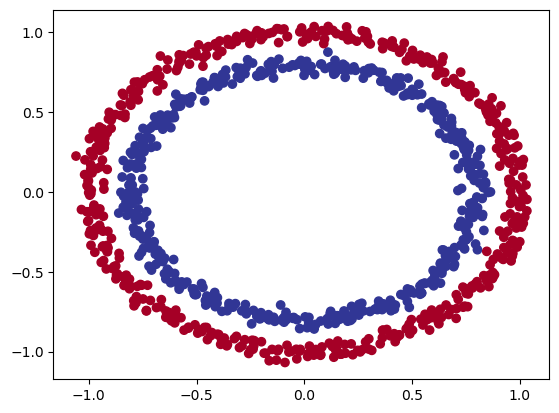

In [7]:
# Visualize with a plot.
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

- We want our model to predict if a given value will belong to the red or blue groups.
- What are the steps in modeling this?
    - First, split the data into training and testing data.
    - Second, create a model appropriate for a binary classification.
    - Third, compile the model.
    - Fourth, fit the model.
    - Fifth, visualize the model.
    - Sixth, evaluate the model.
    - Seventh, tweak the model.
    - Eighth, go back to step 2 as many times as necessary.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
import tensorflow as tf
tf.__version__, tf.config.list_physical_devices()

2023-01-25 15:46:59.095891: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-25 15:46:59.392554: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-25 15:46:59.508427: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-25 15:47:00.179256: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

('2.10.0',
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
  PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')])

In [11]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model.
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model.
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit the model.
model_1.fit(X_train, y_train, epochs=5)

2023-01-25 15:47:02.110988: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5


2023-01-25 15:47:02.111988: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 15:47:02.112186: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 15:47:02.112264: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 15:47:02.746900: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-25 15:47:02.747442: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

25/25 [==============================] - 1s 974us/step - loss: 4.2681 - accuracy: 0.4775
Epoch 2/5
25/25 [==============================] - 0s 907us/step - loss: 4.1947 - accuracy: 0.4512
Epoch 3/5
25/25 [==============================] - 0s 728us/step - loss: 4.1613 - accuracy: 0.4412
Epoch 4/5
25/25 [==============================] - 0s 728us/step - loss: 4.1136 - accuracy: 0.4288
Epoch 5/5
25/25 [==============================] - 0s 738us/step - loss: 4.0733 - accuracy: 0.4225


In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 1)                   3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model.
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model.
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit the model.
model_2.fit(X_train, y_train, epochs=5)

Epoch 1/5
25/25 [==============================] - 0s 922us/step - loss: 4.3784 - accuracy: 0.5000
Epoch 2/5
25/25 [==============================] - 0s 846us/step - loss: 4.0484 - accuracy: 0.5000
Epoch 3/5
25/25 [==============================] - 0s 818us/step - loss: 3.7609 - accuracy: 0.5000
Epoch 4/5
25/25 [==============================] - 0s 814us/step - loss: 3.4318 - accuracy: 0.5000
Epoch 5/5
25/25 [==============================] - 0s 812us/step - loss: 2.6076 - accuracy: 0.5000


In [14]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (32, 1)                   3         
                                                                 
 dense_2 (Dense)             (32, 1)                   2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


- Didn't work. I'm having some sort of issue with the shape of the input data I think. I need to progress a little further in the videos in order to understand what's going on.

In [15]:
# We have a data set called "circles" which is a pandas dataframe.
# We have a dictionary of data inside which 3 key values pairs
#	X0 - Our X coordinate data
#	X1 - Our y coordinate data
#	label - Our result (1 or 0) which indicates which circle the point is a part of.
# Here we want only the label data and we call the value_counts method on this dataframe to see how many of each value we have in our data.
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

### Improving our model

- To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:
    - Take a trained model, features (X) and lebels (y).
    - Create a meshgrid of the different X values.
    - Make predictions across the meshgrid.
    - Plot the predictions as well as a line between zones (where each unique class falls).

In [16]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (3 layers)
model_3 = tf.keras.Sequential([
	tf.keras.layers.Dense(100),
	tf.keras.layers.Dense(10),
	tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
				optimizer=tf.keras.optimizers.Adam(),
				metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

2023-01-25 15:47:04.942918: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


In [17]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 772us/step - loss: 0.6981 - accuracy: 0.5120


[0.6980902552604675, 0.5120000243186951]

In [18]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


## At this point
- We don't have any good models
- They're prediction rate is still about 0.50 which is 50%
- For a binary classification problem that means that they're basically just guessing.
- For the 3 models, we tried adding more Layers to our model and we tried changing the optimization function (SGD and Adam). Neither seem to be working....

- We should try to visualize the problem a little more before just trying random things.

In [19]:
import numpy as np

- Below we are going to make a function that will take a trained model, X values and lables y values and create a meshgrid of the differnet X values.
- Then we will make predictions across the meshgrid
- Then plot the predictions as well as a line between zones

In [20]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision bounary created by a model predicting on X.
    """
    # Define the axis boundaries of the plot and create a meshgrid.
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X value (we're going to make predictions on these).
    x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together.

    # Make predictions.
    y_pred = model.predict(x_in)

    # Check for multi-class.
    if len(y_pred[0]) > 1:
        print("Doing multi-class classification.")
        # We have to reshape our prediction.
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification.")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary.
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 456us/step
Doing binary classification.


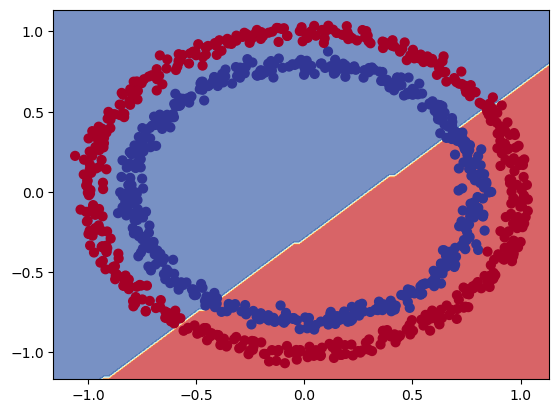

In [21]:
# Check out the predictions our model is making.
plot_decision_boundary(model_3, X=X, y=y)

In [22]:
# Let's see if our model can be used for a regression problem since it seems capable of making a line
tf.random.set_seed(42)

# Create come regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) 	# y = X + 100

#X_regression, y_regression

In [23]:
# Now we can split into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [24]:
X_reg_train.shape, y_reg_train.shape

(TensorShape([150]), TensorShape([150]))

In [25]:
# fit out model to the regression data
# Doesnt work (see below)
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

- Did not work due to an error with the shape.
- This is because we are using the BinaryCrossentropy which requires a different shape for the data.
- We are giving it data in the shape of regression data.
- We will need to change the model to make it work.

In [26]:
# Setup the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
	tf.keras.layers.Dense(100),
	tf.keras.layers.Dense(10),
	tf.keras.layers.Dense(1)
])

# 2. Compile the model (this time with a regression loss function)
model_3.compile(loss=tf.keras.losses.mae,
				optimizer=tf.keras.optimizers.Adam(),
				metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 515.3514 - mae: 515.3514
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 422.8807 - mae: 422.8807
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 334.7757 - mae: 334.7757
Epoch 4/100
5/5 [==============================] - 0s 915us/step - loss: 243.6640 - mae: 243.6640
Epoch 5/100
5/5 [==============================] - 0s 902us/step - loss: 148.7395 - mae: 148.7395
Epoch 6/100
5/5 [==============================] - 0s 956us/step - loss: 55.4003 - mae: 55.4003
Epoch 7/100
5/5 [==============================] - 0s 965us/step - loss: 69.8452 - mae: 69.8452
Epoch 8/100
5/5 [==============================] - 0s 959us/step - loss: 75.5395 - mae: 75.5395
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 54.7457 - mae: 54.7457
Epoch 10/100
5/5 [==============================] - 0s 998us/step - loss: 46.4224 - mae: 46.4224
Epoch 11/100
5/5 [===================

2/2 [==============================] - 0s 1ms/step


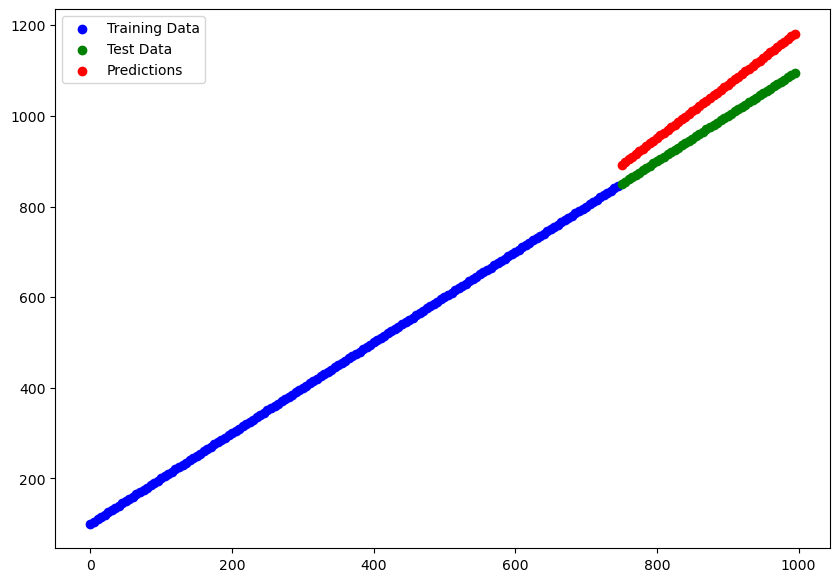

In [27]:
# Make predictions with out trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c='g', label="Test Data")
plt.scatter(X_reg_test, y_reg_preds, c='r', label="Predictions")
plt.legend();

## The missing piece: Non linearity
- We can see that our model performs reasonably well with a linear regression. 
- The reason it isn't working well with the circle data is because our data is not using non-linearity.

Challenge Question: What could you draw if you had an unlimited amount of straight (linear) and non-strait (non-linear) lines?

Now we are going to try to recreate this neural network in TF
https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=1&seed=0.38625&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [28]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (Changing the activation hyperparameter here to linear activation)
model_4 = tf.keras.Sequential([
	tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)	# Represents the 
])

# 2. Compile the model (setting learning rate for Adam to 0.001)
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
				optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
				metrics=["accuracy"]
)

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 0s 907us/step - loss: 4.4142 - accuracy: 0.4740
Epoch 2/100
32/32 [==============================] - 0s 849us/step - loss: 4.3810 - accuracy: 0.4750
Epoch 3/100
32/32 [==============================] - 0s 877us/step - loss: 4.3578 - accuracy: 0.4720
Epoch 4/100
32/32 [==============================] - 0s 851us/step - loss: 4.3477 - accuracy: 0.4740
Epoch 5/100
32/32 [==============================] - 0s 864us/step - loss: 4.3451 - accuracy: 0.4730
Epoch 6/100
32/32 [==============================] - 0s 870us/step - loss: 4.3427 - accuracy: 0.4730
Epoch 7/100
32/32 [==============================] - 0s 875us/step - loss: 4.3403 - accuracy: 0.4730
Epoch 8/100
32/32 [==============================] - 0s 892us/step - loss: 4.3379 - accuracy: 0.4710
Epoch 9/100
32/32 [==============================] - 0s 908us/step - loss: 4.3355 - accuracy: 0.4710
Epoch 10/100
32/32 [==============================] - 0s 879us/step - loss: 4.3332 - accura

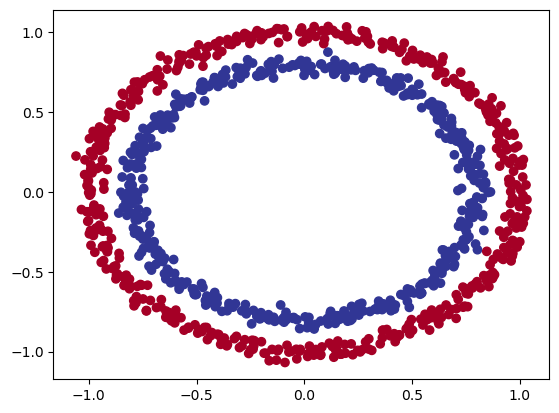

In [29]:
# Plot our data again..
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 419us/step
Doing binary classification.


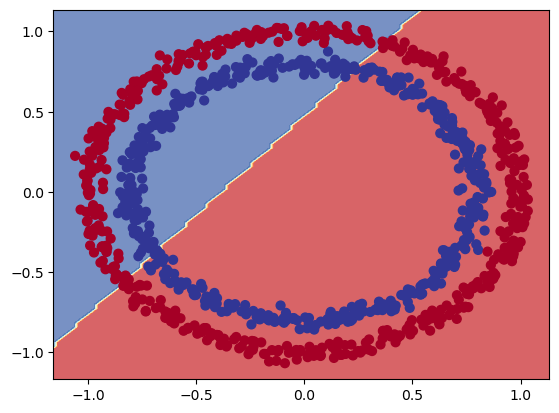

In [30]:
# Check the decision boundary as we did before
plot_decision_boundary(model_4, X=X, y=y)

In [31]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model 
# Since we have a bianry classification problem, it would be good for our last layer
# for neurons to be a single on/off. 
# that's the "output layer"
model_5 = tf.keras.Sequential([
	tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
	tf.keras.layers.Dense(4, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
				optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
				metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=300)


Epoch 1/300
32/32 [==============================] - 0s 981us/step - loss: 3.4979 - accuracy: 0.2420
Epoch 2/300
32/32 [==============================] - 0s 955us/step - loss: 3.2611 - accuracy: 0.2390
Epoch 3/300
32/32 [==============================] - 0s 932us/step - loss: 3.0736 - accuracy: 0.2620
Epoch 4/300
32/32 [==============================] - 0s 936us/step - loss: 2.7014 - accuracy: 0.2640
Epoch 5/300
32/32 [==============================] - 0s 931us/step - loss: 1.9096 - accuracy: 0.2690
Epoch 6/300
32/32 [==============================] - 0s 975us/step - loss: 1.8224 - accuracy: 0.2690
Epoch 7/300
32/32 [==============================] - 0s 999us/step - loss: 1.7740 - accuracy: 0.2690
Epoch 8/300
32/32 [==============================] - 0s 1ms/step - loss: 1.7472 - accuracy: 0.2660
Epoch 9/300
32/32 [==============================] - 0s 1ms/step - loss: 1.7223 - accuracy: 0.2630
Epoch 10/300
32/32 [==============================] - 0s 971us/step - loss: 1.6875 - accuracy: 

313/313 [==============================] - 0s 452us/step
Doing multi-class classification.


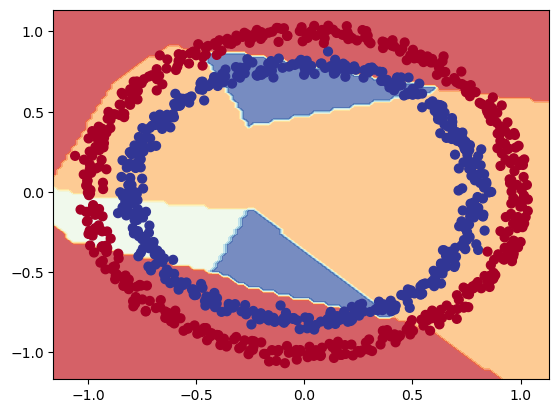

In [32]:
plot_decision_boundary(model_5, X=X, y=y)

In [33]:
# Evaluate the model
model_5.evaluate(X, y)

32/32 [==============================] - 0s 777us/step - loss: 0.4171 - accuracy: 0.4940


[0.41707873344421387, 0.49399998784065247]

There was a model_6 but I just edited model_5...

In [34]:
# set the seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
	tf.keras.layers.Dense(8, activation="relu"),
	tf.keras.layers.Dense(8, activation="relu"),
	tf.keras.layers.Dense(1, activation="sigmoid")
])
# 2. Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
				optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
				metrics=["accuracy"])

# 3. Fit the model
model_7.fit(X, y, epochs=200)


Epoch 1/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5030
Epoch 2/200
32/32 [==============================] - 0s 978us/step - loss: 0.6909 - accuracy: 0.5020
Epoch 3/200
32/32 [==============================] - 0s 984us/step - loss: 0.6899 - accuracy: 0.5010
Epoch 4/200
32/32 [==============================] - 0s 962us/step - loss: 0.6892 - accuracy: 0.5100
Epoch 5/200
32/32 [==============================] - 0s 961us/step - loss: 0.6883 - accuracy: 0.5320
Epoch 6/200
32/32 [==============================] - 0s 961us/step - loss: 0.6871 - accuracy: 0.5310
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.5490
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6850 - accuracy: 0.5420
Epoch 9/200
32/32 [==============================] - 0s 987us/step - loss: 0.6839 - accuracy: 0.5640
Epoch 10/200
32/32 [==============================] - 0s 966us/step - loss: 0.6824 - accuracy: 0.

313/313 [==============================] - 0s 460us/step
Doing binary classification.


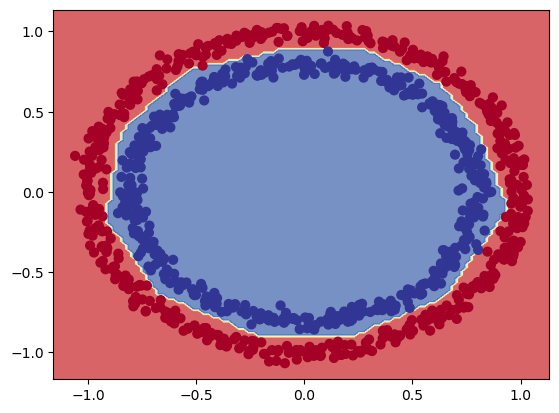

In [35]:
# Visualize, visualize, visualize
plot_decision_boundary(model_7, X, y)

In [36]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 788us/step - loss: 0.0241 - accuracy: 1.0000


[0.02413451299071312, 1.0]

Challenge Question:
What's wrong with the predictions we've made? Are we really evaluating our model correctly? Hint: what data did the model learn on and what data did we predict on?

My Answer:
We are evaluating and predicting on the same data, which is why our prediction metrics are so high. I would expect a much lower accuracy if we did a train/test split.

NOTE: The combination of linear and non-linear functions is one of the key fundamentals of neural networks.

### Re-making Activation functions.

In [37]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

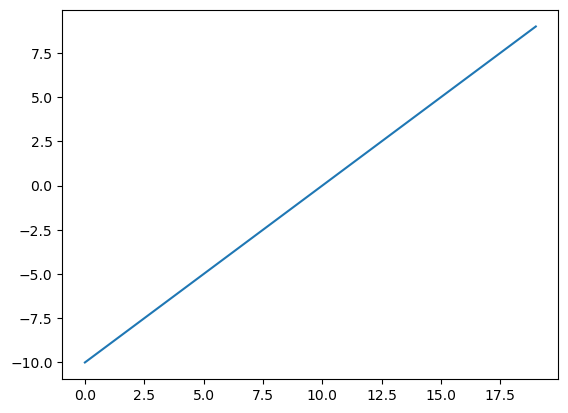

In [38]:
plt.plot(A)

In [39]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
	return 1/(1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor.
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

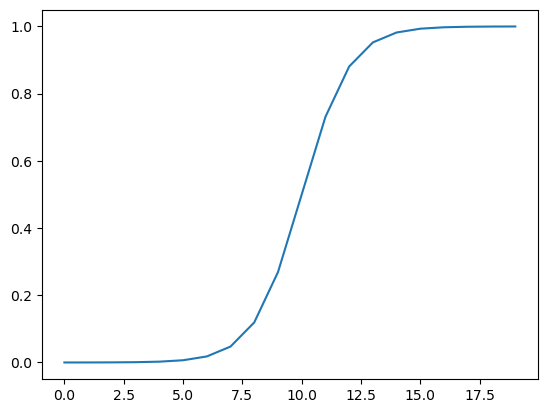

In [40]:
# Let's visualize the sigmoid output..
plt.plot(sigmoid(A))

- This is the sigmoid activation function. Notice that it is not linear or a straight line (vs linear activation function).
- When we first tried to fit our data to our model, we used linear activation functions for our neuron layers.
- When we changed that to ReLU and sigmoid we essencially said the model is allowed to use non straight activation functions.

In [41]:
# Let's show relu now...
# For each x value passed, we return the maximum between the value passed and 0. 
# If the number is negative we return 0. 
# If the number is positive we return the number.
def relu(x):
	return tf.maximum(x, 0)

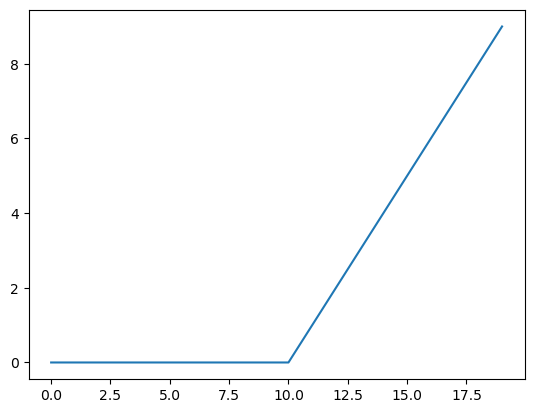

In [42]:
# Now we can plot the data and see ReLU
plt.plot(relu(A))

In [43]:
# Lastly for completeness, we can try the linear activation..
# If we look at the tf.keras.activations.linear(a) documentation, 
# we see that the function returns the input unmodified.
# https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear
def linear(x):
	return x

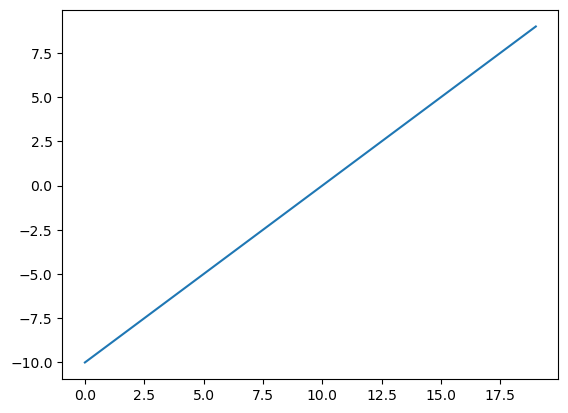

In [44]:
plt.plot(linear(A))

- It's worth noting now that when we use the linear activation functions, we had a hard time getting out model to work.
- This is because linear activations don't change our data in any way; it just returns the input unmodified.
- With non-linear functions (sigmoid and ReLU), it is able to more easily find patterns in non-linear data.

### Evaluating and improving our classification model

- So far we've been training and making predictions on the same data-set.
- Why is this bad??
- We have 3 data sets in machine learning
	1. Training set
		- This is the data that the model uses to learn from
		- In school this is like the course materials for a student.
	2. Validation set
		- This data is used to assess how the model does during training.
		- In school, this is like a practice exam for the students.
	3. Test set
		- This data is used to actually test our model.
		- In school, this is like a final exam for the students.

In [45]:
# Check how many examples we have
len(X)

1000

In [46]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [47]:
# Let's recreate a model to fit on the training data nd evaluate on the testing data

# set random seed
tf.random.set_seed(42)

# 1. Create a model
# Notes:
# This is really just the structure of our neural network.
# In python speak, this is a function call to the Sequntial function in keras
# this takes as an argument an array of layer objects which we define here.
model_8 = tf.keras.Sequential([
	tf.keras.layers.Dense(4, activation="relu"),
	tf.keras.layers.Dense(4, activation="relu"),
	tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
# Notes on Compilation:
# The loss function is a function that determines how wrong we are from 
# what an acceptable answer would be. This is our score in wrongness.
# The optimizer is a function that tell us how to improve to decrease
# our loss.
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
				optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
				metrics=["accuracy"]
)

# 3. Fit the model
# Notes:
# Here we fit the model with our train data set and run it for 100 epochs.
# We also want to start setting the return from this method to the history
# variable. 
# Notice that we increased the learning_rate above and decreased the number
# of epochs to only 25.
history_8 = model_8.fit(X_train, y_train, epochs=25)

# 4. Evaluate the model
model_8.evaluate(X_test, y_test)

Epoch 1/25
25/25 [==============================] - 0s 917us/step - loss: 0.6892 - accuracy: 0.5075
Epoch 2/25
25/25 [==============================] - 0s 857us/step - loss: 0.6843 - accuracy: 0.5437
Epoch 3/25
25/25 [==============================] - 0s 836us/step - loss: 0.6790 - accuracy: 0.5412
Epoch 4/25
25/25 [==============================] - 0s 834us/step - loss: 0.6728 - accuracy: 0.5587
Epoch 5/25
25/25 [==============================] - 0s 841us/step - loss: 0.6661 - accuracy: 0.5888
Epoch 6/25
25/25 [==============================] - 0s 847us/step - loss: 0.6544 - accuracy: 0.5763
Epoch 7/25
25/25 [==============================] - 0s 823us/step - loss: 0.6385 - accuracy: 0.6350
Epoch 8/25
25/25 [==============================] - 0s 891us/step - loss: 0.6204 - accuracy: 0.6837
Epoch 9/25
25/25 [==============================] - 0s 843us/step - loss: 0.5861 - accuracy: 0.7000
Epoch 10/25
25/25 [==============================] - 0s 861us/step - loss: 0.5483 - accuracy: 0.7550

[0.09414107352495193, 0.9850000143051147]

313/313 [==============================] - 0s 447us/step
Doing binary classification.
313/313 [==============================] - 0s 457us/step
Doing binary classification.


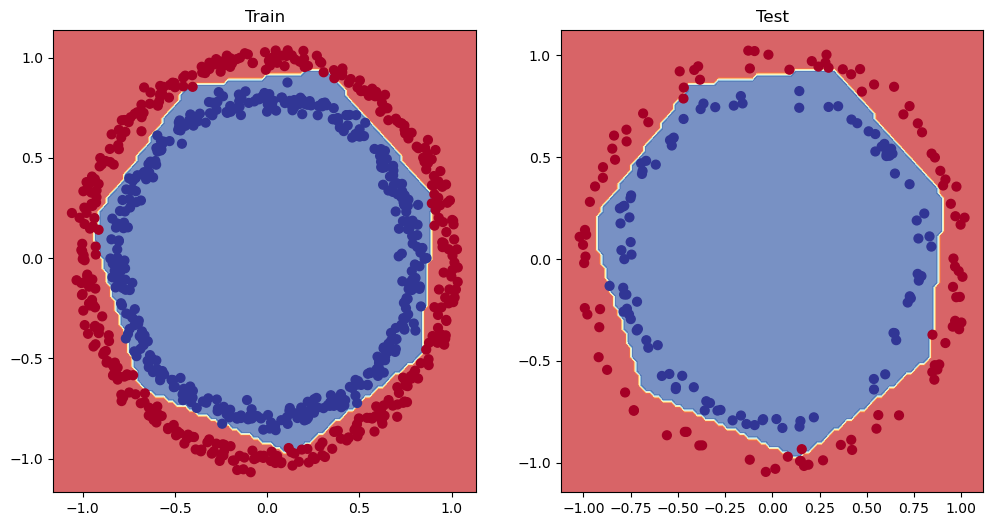

In [48]:
# Plot the decision boundary for both the train and test..
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)

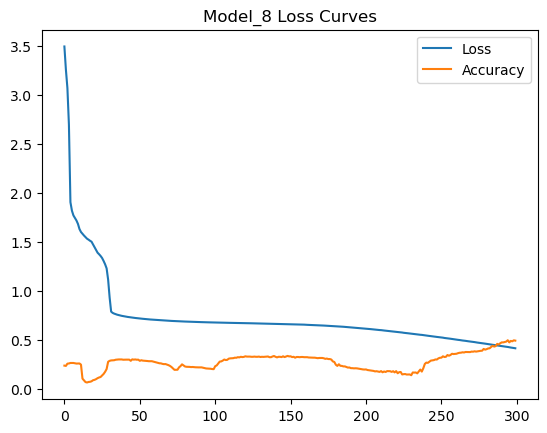

In [49]:
# Plot the loss curves (aka training curves) with the history
# Remember we saved the history as the return from the function
# modle.fit
plt.figure()
plt.title("Model_8 Loss Curves")
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["accuracy"], label="Accuracy")
plt.legend()

- NOTE: For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the groud truth labels).

### Finding the ideal learning rate

- To find the ideal learning rate (the learning where the los decreases the most during training) we're going to use the following steps:
	- A learning rate **Callback** - You can think of a callback as an extra piece of functionality, you can add to your model *while* it's training.
	- Another model (we could use the same one as above, but we're going to make a new one)
	- A modified loss curves plot.

In [50]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model (same as model_8)
model_9 = tf.keras.Sequential([
	tf.keras.layers.Dense(4, activation="relu"),
	tf.keras.layers.Dense(4, activation="relu"),
	tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
				optimizer=tf.keras.optimizers.Adam(),
				metrics=["accuracy"]
)

# Create a learning rate callback
# The lambda function here says:
# Starting from the first callback, return a value starting from 1e-4, increasing
# by 10 to the power of epoch number divided by 20 every epoch.
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

# Fit the model (pass the lr_scheduler callback)
# callbacks takes a list so you can pass several if you want. 
# Here it's only 1
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 955us/step - loss: 0.7007 - accuracy: 0.4775 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 868us/step - loss: 0.7006 - accuracy: 0.4775 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 835us/step - loss: 0.7004 - accuracy: 0.4750 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 824us/step - loss: 0.7002 - accuracy: 0.4800 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 824us/step - loss: 0.7000 - accuracy: 0.4850 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 811us/step - loss: 0.6998 - accuracy: 0.4825 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 854us/step - loss: 0.6995 - accuracy: 0.4787 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 874us/step - loss: 0.6992 - accuracy: 0.4863 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 

<AxesSubplot:xlabel='epochs'>

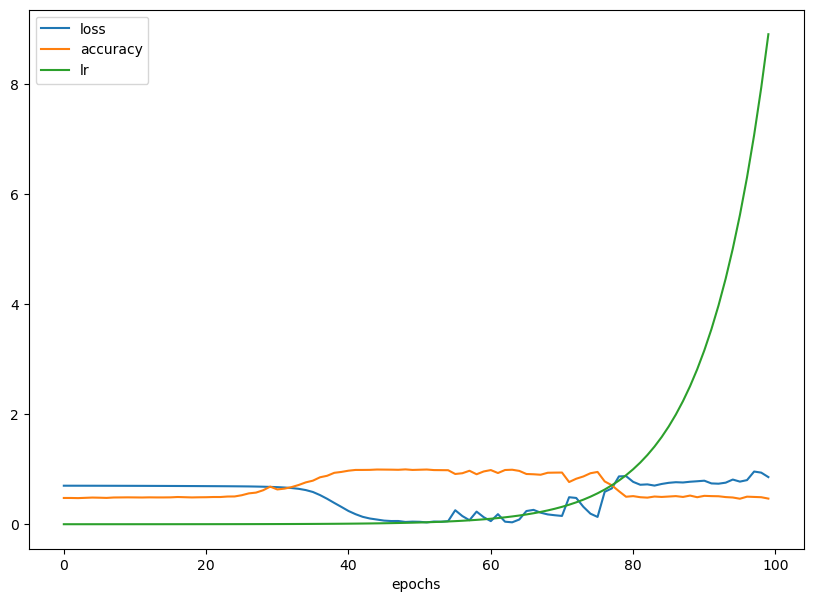

In [51]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning Rate vs Loss')

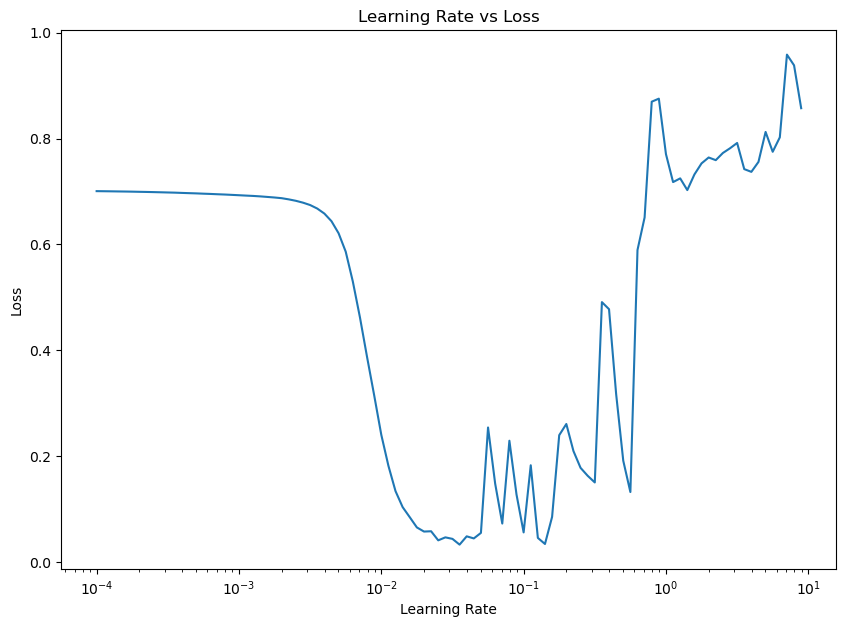

In [52]:
# Plot the Learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
# with semilogx we can make a graph where the x axis is a log scale, but the y is linear
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")
# We should see with different learning rates what loss we get.
# Usually the best learning rate is found at the bottom of the largest
# decrease, but not quite at the bottom.
# On this graph we would consider it around 20e-2 ish

- Typically learning rates are round magnitudes of 10
	- eg. 10e0, 10e-1, 10e-2, 10e-3, etc

In [53]:
# Here we'll try to update the learning rate and see if we can get 
# better performance than the previous model (model_9)

# Set the seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
	tf.keras.layers.Dense(4, activation="relu"),
	tf.keras.layers.Dense(4, activation="relu"),
	tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
				optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
				metrics=["accuracy"]
)

# Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=20)



Epoch 1/20
25/25 [==============================] - 0s 984us/step - loss: 0.6944 - accuracy: 0.5025
Epoch 2/20
25/25 [==============================] - 0s 869us/step - loss: 0.6928 - accuracy: 0.5250
Epoch 3/20
25/25 [==============================] - 0s 909us/step - loss: 0.6888 - accuracy: 0.5300
Epoch 4/20
25/25 [==============================] - 0s 889us/step - loss: 0.6757 - accuracy: 0.5788
Epoch 5/20
25/25 [==============================] - 0s 881us/step - loss: 0.6593 - accuracy: 0.6062
Epoch 6/20
25/25 [==============================] - 0s 943us/step - loss: 0.6200 - accuracy: 0.6587
Epoch 7/20
25/25 [==============================] - 0s 899us/step - loss: 0.5899 - accuracy: 0.6762
Epoch 8/20
25/25 [==============================] - 0s 885us/step - loss: 0.5777 - accuracy: 0.6825
Epoch 9/20
25/25 [==============================] - 0s 901us/step - loss: 0.5338 - accuracy: 0.7462
Epoch 10/20
25/25 [==============================] - 0s 913us/step - loss: 0.4806 - accuracy: 0.8150

<AxesSubplot:>

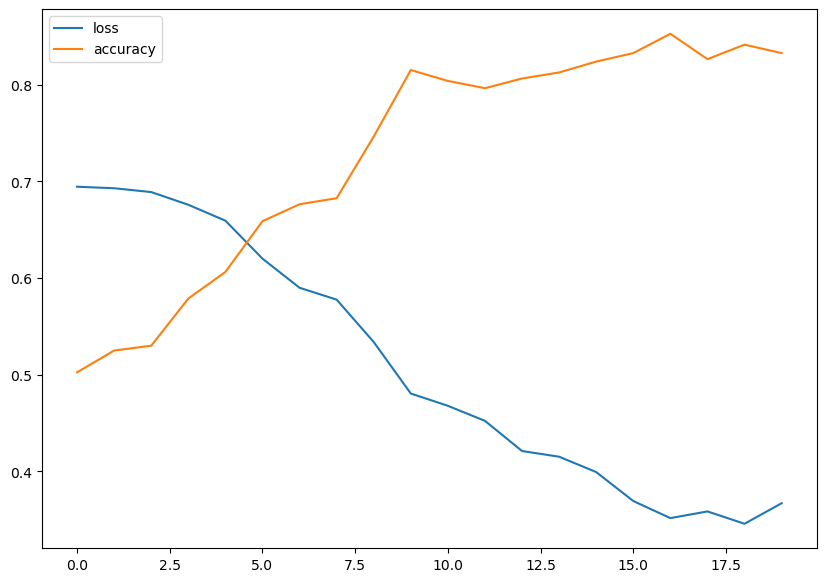

In [54]:
pd.DataFrame(history_10.history).plot(figsize=(10, 7))

<AxesSubplot:>

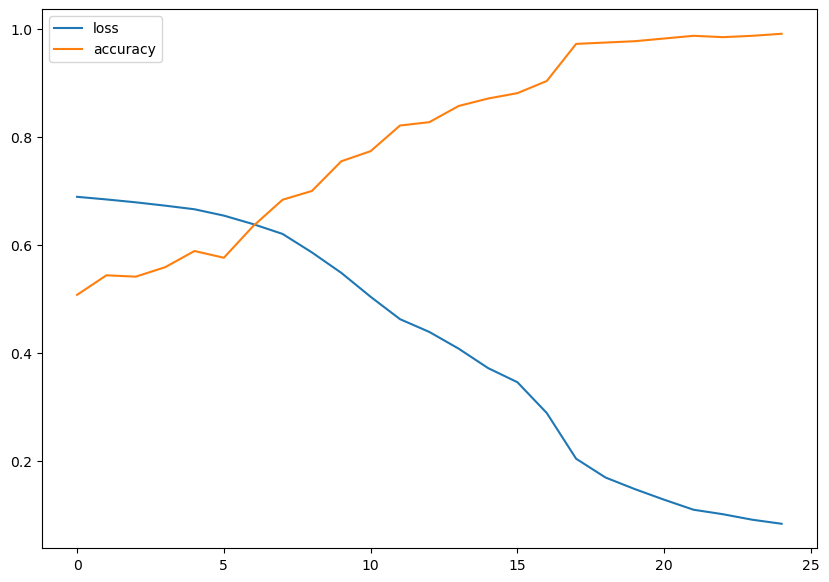

In [55]:
pd.DataFrame(history_8.history).plot(figsize=(10, 7))

In [56]:
# Evaluate model_10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.3605 - accuracy: 0.8350


[0.36052435636520386, 0.8349999785423279]

In [57]:
# Evaluate model_8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0941 - accuracy: 0.9850


[0.09414107352495193, 0.9850000143051147]

313/313 [==============================] - 0s 493us/step
Doing binary classification.
313/313 [==============================] - 0s 465us/step
Doing binary classification.


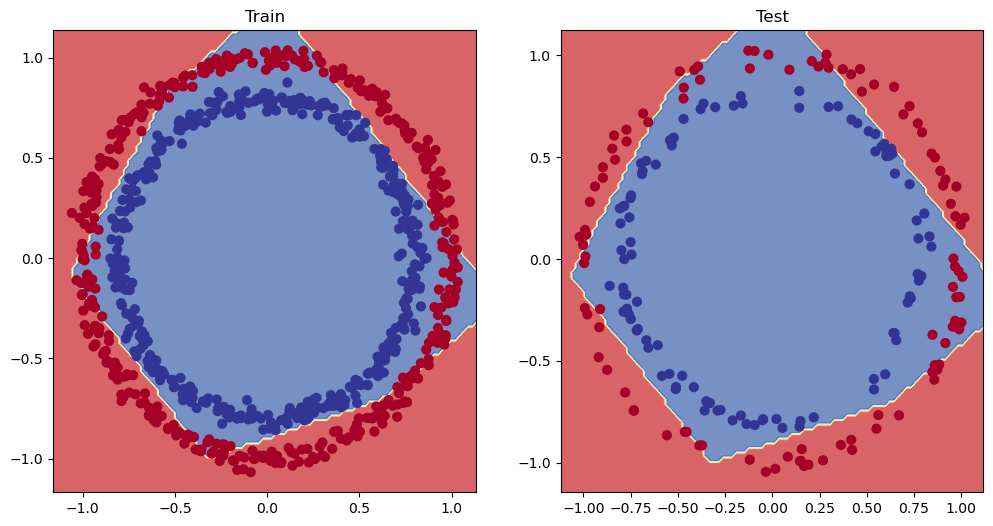

In [58]:
# Plot the decision boundaries for th training and the test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X_test, y_test)

### Introducing more classification evaluation methods

- There are many ways to evaluate your models.
- This is arguably one of the more important parts of machine learning because while making models is very important their actual use/fit to the problem depends on how we evaluate them.

- Key
	- tp = True Positive
	- tn = True Negative
	- fp = False Positive
	- fn = False Negative

| Metric Name | Metric Formula | Code | When to use |
|---|---|---|---|
| Accuracy | Accuracy = (tp + tn) / (tp + tn + fp + fn) | tf.keras.metrics.Accuracy() or sklearn.metrics.accuracy_score() | Default metric for classification problems. Not the best for imballenced classes. |
| Precision | Precision = tp / (tp + fp) | tf.keras.metrics.Precision() or sklearn.metrics.precision_score() | Higher precision leads to less false positives. |
| Recall | Recall = tp / (tp + fn) | tf.keras.metrics.Recall() or sklearn.metrics.recall_score() | Higher recall leads to less false negatives. |
| F1-Score | F1_Score = 2 * [ (precision * recall) / (precision + recall) ] | sklearn.metrics.f1_score() | Combination of precision and recall, usually a good overall metric for a classification model. |
| Confusion Matrix | NA | Custom function or sklearn.metrics.confusion_matrix() | When comparing predictions to truth labels to see where model gets confused. Can be hard to use with large numbers of classes. |

- Precision and Recall are inversely related. You can't raise both at the same time. You need to find a balance between the two. This is called the Precision/Recall Tradeoff.

### Finding the accuracy of our classification model

- More classification evaluation methods
- Alongisde visualizing our models results as much as possible, there are a handful of other classifications evaluation methods and metrics you should be familiar with:
	- Accuracy
	- Precision
		- Less False positives
	- Recall
		- Less False Negatives
	- F1 Score
	- Confusion matrix
	- Classification report (from Scikit-Learn)
- Essencially these metrics all compare a set of true values to a set of predictions and see report how the model performed.

In [59]:
# Check the accuracy of our model.
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the tets set: {loss}")
print(f"Model accuracy on the tets set: {(accuracy * 100):.2f}%")

7/7 [==============================] - 0s 1ms/step - loss: 0.3605 - accuracy: 0.8350
Model loss on the tets set: 0.36052435636520386
Model accuracy on the tets set: 83.50%


### Creating our first confusion matrix (to see where our model is getting confused)

- A confusion matrix should look something like this:

| | | Confusion Matrix| |
|---|---|---|---|
| | | Predicted Label |
| | | 0 | 1 |
|True Label | 0 | 99 (98.0%) | 2 (2.0%) |
| | 1 | 0 (0.0%) | 99 (100.0%) |

- When information is laid out like this, on the diagonal lies the True Positives and the True Negatives.
	- These are the squares with 99 and 99.
- The squares that are not on this axis then are the False positives and the False negatives
	- These are the squares with 2 and 0.


### Creating our first confusion matrix

In [60]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 710us/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [61]:
y_test[:10], y_preds[:10]

(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]),
 array([[0.58672196],
        [0.9304132 ],
        [0.6792207 ],
        [0.9641978 ],
        [0.39926127],
        [0.3223663 ],
        [0.868562  ],
        [0.5137088 ],
        [0.75619537],
        [0.24718973]], dtype=float32))

- Here we can see that by using the sigmoid function to make our predictions, we get continuous numbers and we need them to be either 1 or 0 to match with our test values.